In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
file_path = '/content/final_cleaned_weather_data.csv'
weather_data = pd.read_csv(file_path)

In [32]:
weather_data.head(), weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date/Time          8784 non-null   object 
 1   Temprature         8784 non-null   float64
 2   Dew Point Temp_C   8784 non-null   float64
 3   Rel Hum_%          8784 non-null   int64  
 4   Wind Speed_km/h    8784 non-null   int64  
 5   Visibility_km      8784 non-null   float64
 6   Press_kPa          8784 non-null   float64
 7   Weather Condition  8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


(             Date/Time  Temprature  Dew Point Temp_C  Rel Hum_%  \
 0  2012-01-01 00:00:00        -1.8              -3.9         86   
 1  2012-01-01 01:00:00        -1.8              -3.7         87   
 2  2012-01-01 02:00:00        -1.8              -3.4         89   
 3  2012-01-01 03:00:00        -1.5              -3.2         88   
 4  2012-01-01 04:00:00        -1.5              -3.3         88   
 
    Wind Speed_km/h  Visibility_km  Press_kPa     Weather Condition  
 0                4            8.0     101.24                   Fog  
 1                4            8.0     101.24                   Fog  
 2                7            4.0     101.26  Freezing Drizzle,Fog  
 3                6            4.0     101.27  Freezing Drizzle,Fog  
 4                7            4.8     101.23                   Fog  ,
 None)

In [33]:
#Correlation

numerical_columns = ['Temprature','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']

In [34]:
correlation_matrix = weather_data[numerical_columns].corr()

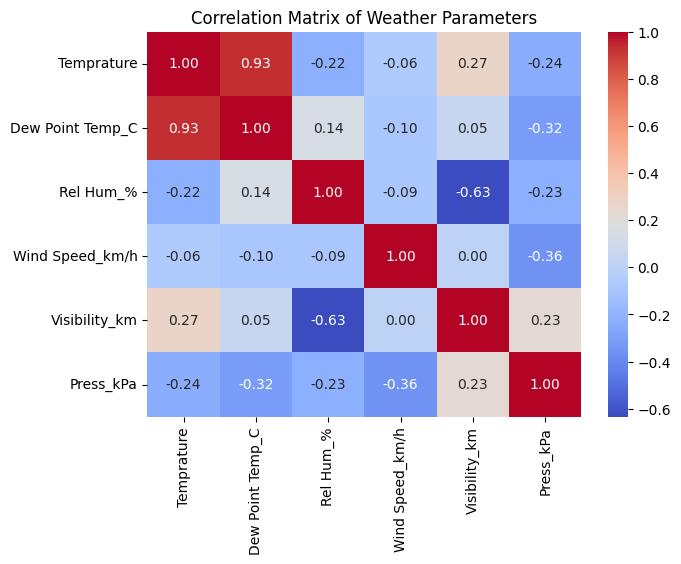

In [35]:
plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Weather Parameters')
plt.show()

In [36]:
#Train_Test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
X = weather_data[numerical_columns].drop(columns='Temprature')
y = weather_data['Temprature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(0.7143056054037348, 0.9950225814501568)